<a href="https://colab.research.google.com/github/dyjs-js/DaconStudy/blob/main/SeoulBicycle/SeoulBicycle_20221105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 다운로드

In [ ]:
!wget https://raw.githubusercontent.com/dyjs-js/DACONstudy/main/data/SeoulBicycle/test.csv
!wget https://raw.githubusercontent.com/dyjs-js/DACONstudy/main/data/SeoulBicycle/train.csv
!wget https://raw.githubusercontent.com/dyjs-js/DACONstudy/main/data/SeoulBicycle/submission.csv

--2022-11-08 11:41:12--  https://raw.githubusercontent.com/dyjs-js/DACONstudy/main/data/SeoulBicycle/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35719 (35K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]  34.88K  --.-KB/s    in 0.002s  

2022-11-08 11:41:12 (14.5 MB/s) - ‘test.csv’ saved [35719/35719]

--2022-11-08 11:41:12--  https://raw.githubusercontent.com/dyjs-js/DACONstudy/main/data/SeoulBicycle/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80667 (79K) [text/plain]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
smpl_sub=pd.read_csv('submission.csv')

In [ ]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [ ]:
#train데이터의 열 별정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [ ]:
#널값 세는 함수 사용

In [ ]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [ ]:
#test의 열 별정보 확인
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


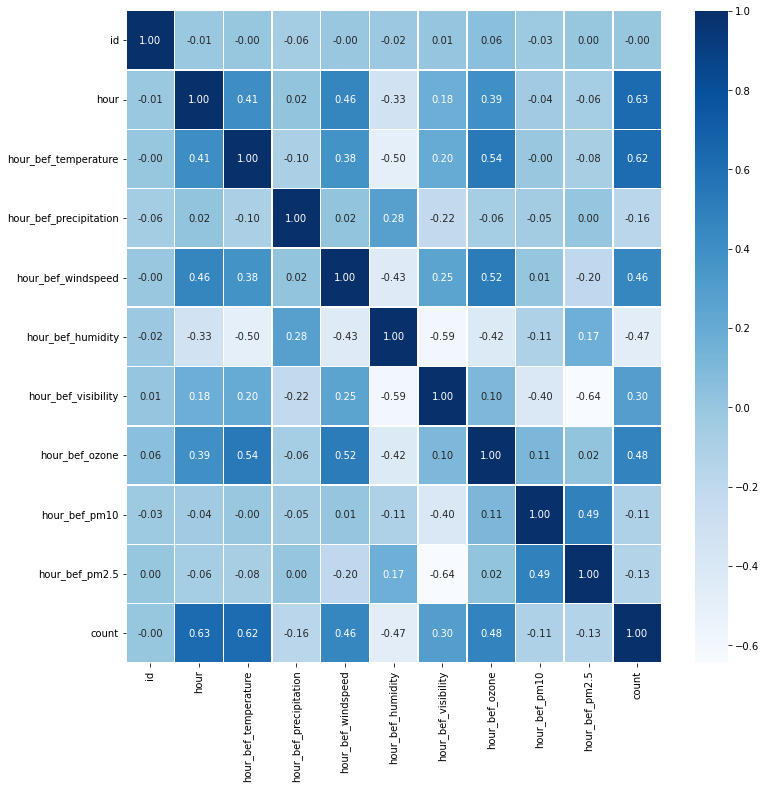

In [ ]:
#train변수 간 상관관계 확인
plt.figure(figsize=(12,12))
sns.heatmap(data=train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

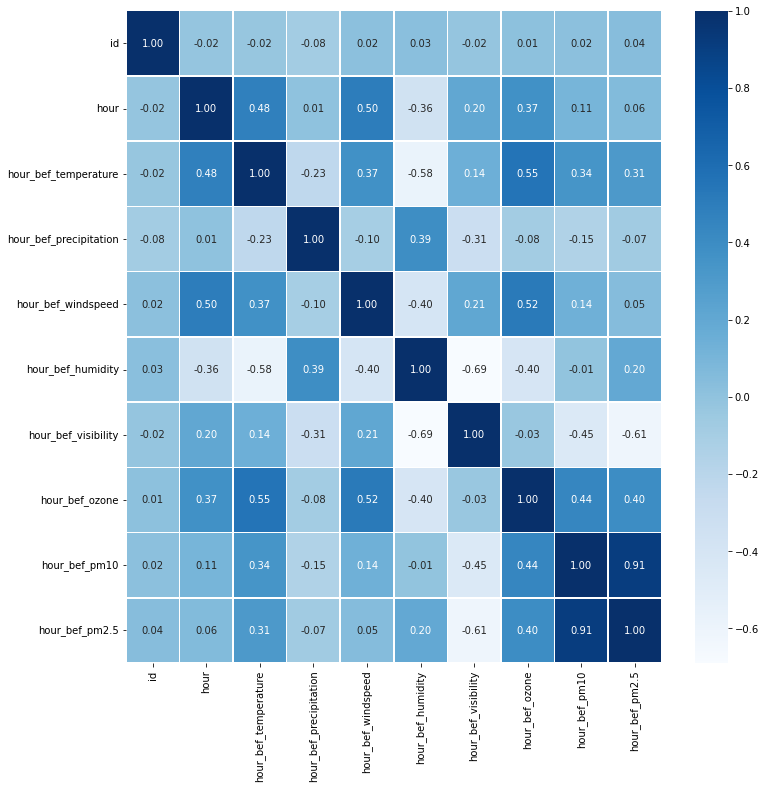

In [ ]:
#test의 변수 간 상관관계를 확인
plt.figure(figsize=(12,12))
sns.heatmap(data=test.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

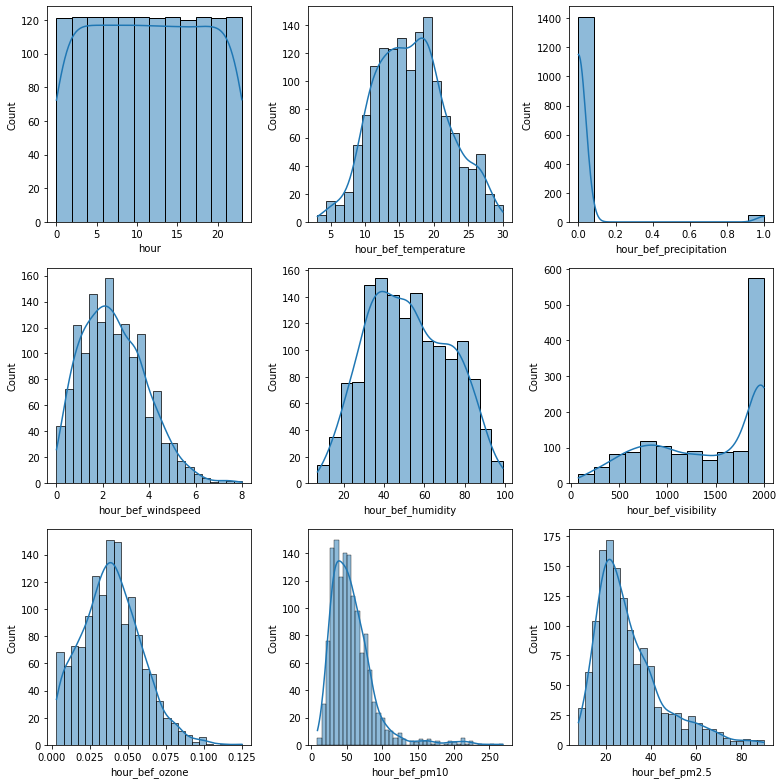

In [ ]:
#train의 각 변수별 분포 확인
plt.figure(figsize=(11,11))
for i in range(1,10):
  plt.subplot(3,3,i)
  sns.histplot(train.iloc[:,i],kde=True)
plt.tight_layout()
plt.show()


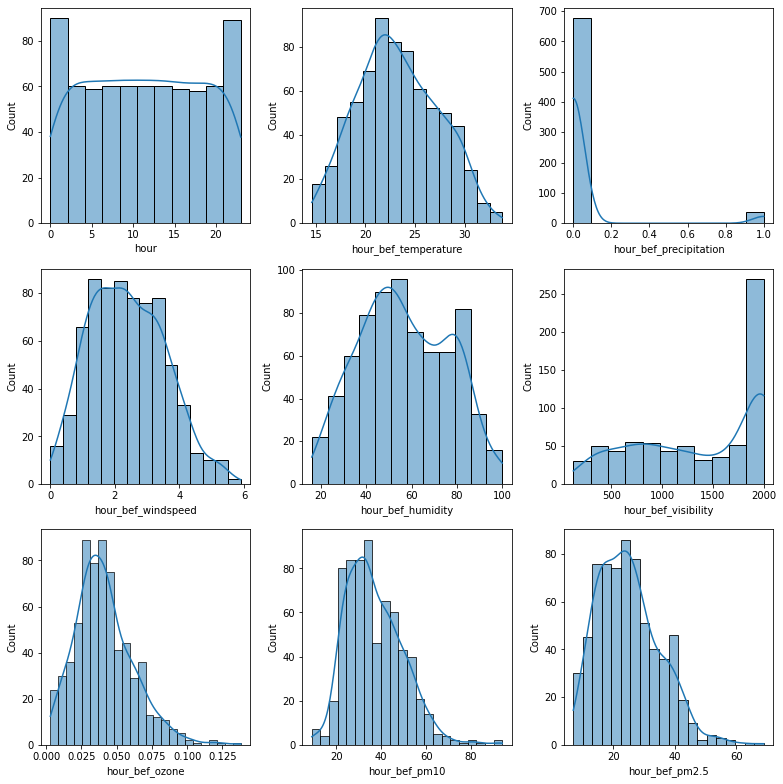

In [ ]:
#test의 각 변수별 분포별 확인
plt.figure(figsize=(11,11))
for i in range(1,10):
  plt.subplot(3,3,i)
  sns.histplot(test.iloc[:,i],kde=True)
plt.tight_layout()
plt.show()



In [ ]:
#결측치 처리

결측치 처리

Normalization

모델 정의 및 학습(최소 두가지 모델을 적용해보기)
랜덤포레스트 & 앙상블 모델(sticking)이 좋을듯하다.
sticking
regression (회귀)